### ResNe50 을 이용한 식재료 이미지 객체 탐지

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=7dd1608e24c4c54c8afd64e1ec27e3eec3b2934a55b43fe3448360d95a1f843c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

### 데이터 다운로드
Roboflow  : Team4

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="8Zv6K9jnOf2w4tz7CTlg")
project = rf.workspace("dsstudy-h0rzy").project("food-ingredients-image-detection_team4")
dataset = project.version(1).download("multiclass")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Food-Ingredients-Image-Detection_Team4-1 in multiclass:: 100%|██████████| 9909/9909 [00:03<00:00, 2482.70it/s]


### 데이터 확인

In [ ]:
import os

train_path = '/content/Food-Ingredients-Image-Detection_Team4-1/train'
valid_path = '/content/Food-Ingredients-Image-Detection_Team4-1/valid'
test_path = '/content/Food-Ingredients-Image-Detection_Team4-1/test'

train_fnames = os.listdir(train_path)
valid_fnames = os.listdir(valid_path)
test_fnames = os.listdir(test_path)

class_file = [fname for fname in train_fnames if '.csv' in fname ]
class_file # class 파일
print(len(train_fnames))
print(len(valid_fnames))
print(len(test_fnames))

7066
1661
1177


In [ ]:
import pandas as pd

#### class.csv 파일 확인

In [ ]:
train_class = pd.read_csv(train_path+'/_classes.csv')
valid_class = pd.read_csv(valid_path+'/_classes.csv')
test_class = pd.read_csv(test_path+'/_classes.csv')

test_class.tail()

,filename,-,10_pineapple,10_tangerine,Apple,Bagel,Banana,Bitter melon,Cucumber,Garlic,...,tofu,tomato,tomato_sauce,tortillas,tuna,turkey,watermelon,white rice,yogurt,zucchini
1171,pineapple_25_jpg.rf.ff143fbf93aa907b2fed1ff119...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1172,WhatsApp-Image-2022-10-26-at-1-20-33-PM-1-_jpe...,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1173,DSC_5906_JPG_jpg.rf.ffdd057bbfbfe4730e74677d0a...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1174,20230531_194321_jpg.rf.fcf849f51868c96433757c4...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1175,LINE_ALBUM_-_211223_86_jpg.rf.fd803ebb03bd0440...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


식재료 이미지 종류

- Apple
- Banana
-	Cabbage
-Cantaloupe
- Carrot
- Cucumber
- Egg
- Grape
- Lemon
- Mango
- Mushroom
- Orange
- Peach
- Pear
- Pineapple
- Potato
- Pumpkin
- Tomato

In [ ]:
# label 확인
print(train_class.columns)
print(valid_class.columns)

Index(['filename', ' -', ' 10_pineapple', ' 10_tangerine', ' Apple', ' Bagel',
       ' Banana', ' Bitter melon', ' Cucumber', ' Garlic',
       ...
       ' tofu', ' tomato', ' tomato_sauce', ' tortillas', ' tuna', ' turkey',
       ' watermelon', ' white rice', ' yogurt', ' zucchini'],
      dtype='object', length=164)
Index(['filename', ' -', ' 10_pineapple', ' 10_tangerine', ' Apple', ' Bagel',
       ' Banana', ' Bitter melon', ' Cucumber', ' Garlic',
       ...
       ' tofu', ' tomato', ' tomato_sauce', ' tortillas', ' tuna', ' turkey',
       ' watermelon', ' white rice', ' yogurt', ' zucchini'],
      dtype='object', length=164)


### 데이터 전처리
ResNet 모델에 사용할 수 있도록 데이터 전처리

- class.csv 파일에 담긴 레이블 정보를 이용해 jpg 파일 별 식재료 폴더를 생성   

In [ ]:
def lable_mapping(class_file, dict):
  for _, row in class_file.iterrows():
    filename = row['filename']
    labels = [label.strip()  for label, value in row.items() if not (label in train_class.columns[:2]) and value == 1]
    dict[filename] = labels



In [ ]:
train_label_mapping = {}
valid_label_mapping = {}
test_label_mapping = {}
lable_mapping(train_class, train_label_mapping)
lable_mapping(valid_class, valid_label_mapping)
lable_mapping(test_class, test_label_mapping)

In [ ]:
valid_label_mapping

In [ ]:
train_label_mapping

In [ ]:
import shutil

base_dir = './dataset'
os.mkdir(base_dir)


In [ ]:

def create_lable_folder(path, dir_name, class_file, file_names, mapping_file, except_list ):

  dir = os.path.join(base_dir, dir_name)
  # os.mkdir(dir)

  labels = map(str.strip, class_file.columns.values)
  labels = [lable for lable in labels if not lable in except_list ]

  # 식재료 label 별 폴더 생성
  for cls in labels:
    os.mkdir(os.path.join(dir, cls))

  # lable 폴더별 이미지 파일 복사
  for filename in file_names:
    src = os.path.join(path, filename) # 복사되는 파일 주소
    if '_classes.csv' not in src:  # Exclude the '_classes.csv' file
      dst = os.path.join(os.path.join(dir, mapping_file[filename][0]), filename) # 복사한 파일이 저장되는 주소
      shutil.copyfile(src, dst)





In [ ]:
create_lable_folder(valid_path, 'sample', valid_class, valid_fnames, valid_label_mapping, valid_class.columns[:2])


In [ ]:
# create_lable_folder(train_path, 'train', train_class, train_fnames, train_label_mapping, train_class.columns[:2])
create_lable_folder(valid_path, 'val', valid_class, valid_fnames, valid_label_mapping, valid_class.columns[:2])
create_lable_folder(valid_path, 'test', test_class, test_fnames, test_label_mapping, test_class.columns[:2])

KeyError: ignored

#### 식재료 폴더별 데이터 확인

In [ ]:
labels = os.listdir(train_dir) # 식재료 폴더 리스트
print("count of labels: {}".format(len(labels)))
print("------------------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir(os.path.join(train_dir,label)))))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
cnt = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir( os.path.join(train_dir,labels[cnt])))
        im = Image.open("./dataset/train/{}/{}".format(labels[cnt],image_name))
        col.imshow(im)
        col.set_title(labels[cnt])
        col.axis('off')
        cnt += 1

# fig.suptitle('Train dataset')
plt.show()

In [ ]:
!pip list | grep -e fastai -e torch -e torchvision

In [ ]:
# ! pip install fastai --upgrade
# !pip install -U fastai

### Pytorch with ResNet50

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import os


In [ ]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
epochs = 20

data_transforms = {
    "train": transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomCrop(52),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
     "val": transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomCrop(52),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

}

data_dir = "./dataset"  # Replace this with the actual path to your dataset

dataset = {x : ImageFolder(root = os.path.join(data_dir), transform = data_transforms[x]) for x in ["train", "val"]}
loader = {x : torch.utils.data.DataLoader(dataset[x], batch_size = batch_size, shuffle = True, num_workers = 2) for x in ["train", "val"]}
dataset_sizes = {x : len(dataset[x]) for x in ["train", "val"]}
class_names = dataset["train"].classeses

for x in ["train", "val"]:
    print(f"Number of samples in {x} dataset: {dataset_sizes[x]}")
print("Class names:", class_names)



Number of samples in train dataset: 7872
Number of samples in val dataset: 1968
Number of samples in test dataset: 2500
Class names: ['Apple', 'Banana', 'Broccoli', 'Cabbage', 'Cantaloupe', 'Carrot', 'Cucumber', 'Egg', 'Grape', 'Lemon', 'Mango', 'Mushroom', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Potato', 'Pumpkin', 'Tomato']


In [ ]:
from torchvision import models
#  ImageNet 데이터셋으로 학습된 가중치를 사용
resnet = models.resnet50(pretrained = True)
# ResNet50 모델의 마지막 fully connected(fc) 레이어의 입력 채널 수를 가져와 입력 차원 결정
num_ftrs = resnet.fc.in_features
# 모델은 19개의 클래스(식재료 종류)를 구분하는 다중 클래스 분류기로 변환됩니다.
resnet.fc = nn.Linear(num_ftrs, 19)
resnet = resnet.to(device)

# 다중 클래스 분류 문제를 해결하기 위해 교차 엔트로피 손실 함수를 사용
criterion = nn.CrossEntropyLoss()

# requires_grad=True인 파라미터들만 업데이트
optimizer_ft = optim.Adam(filter(lambda p : p.requires_grad, resnet.parameters()), lr=0.001)

from torch.optim import lr_scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 5, gamma = 0.1)


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.


In [ ]:
 # ResNet50 모델의 첫 5개 층을 제외하고 나머지 층들의 학습을 비활성화

ct = 0
for child in resnet.children():
  ct += 1
  if ct < 6:
    for param in child.parameters():
      param.requires_grad = False

In [ ]:
def train_resnet(model, criterion, optimizer, scheduler, num_epochs = 25):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0

    for epoch in range(num_epochs):
        print(f"---------- epoch {epoch + 1} ----------")
        since = time.time()

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in loader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    x, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)       # 교차엔트로피 계산 deafualt값이 mean이므로 각 데이터 마다의 손실 평균이 저장되있음
                                                                   # 한 배치 사이즈의 loss 총합을 계산!
                running_corrects += torch.sum(preds == labels.data)

            if phase == "train":
                scheduler.step()
                l_r = [x["lr"] for x in optimizer_ft.param_groups]
                print("learning rate : ", l_r)

            epoch_loss = running_loss/dataset_sizes[phase]          # 전체 데이터 loss합을 각 데이터셋 전체 크기로 나눠주어 loss계산
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print("Completed in {:.0f}m {:0f}s".format(time_elapsed // 60, time_elapsed % 60))

    print("Best val Acc: {:.4f}".format(best_acc))

    model.load_state_dict(best_model_wts)

    return model

In [ ]:
model_resnet50 = train_resnet(resnet, criterion, optimizer_ft, exp_lr_scheduler)
torch.save(model_resnet50, "resnet50_2.pt")

---------- epoch 1 ----------
learning rate :  [0.001]
train Loss: 2.306251 Acc: 0.5658
val Loss: 2.150400 Acc: 0.6179
Completed in 0m 58.613006s
---------- epoch 2 ----------
learning rate :  [0.001]
train Loss: 2.031240 Acc: 0.6449
val Loss: 2.046007 Acc: 0.6575
Completed in 0m 54.861094s
---------- epoch 3 ----------
learning rate :  [0.001]
train Loss: 1.834932 Acc: 0.6945
val Loss: 2.165711 Acc: 0.6479
Completed in 0m 52.325548s
---------- epoch 4 ----------
learning rate :  [0.001]
train Loss: 1.721863 Acc: 0.7287
val Loss: 2.087682 Acc: 0.6347
Completed in 0m 54.797749s
---------- epoch 5 ----------
learning rate :  [0.001]
train Loss: 1.590731 Acc: 0.7544
val Loss: 1.782699 Acc: 0.7195
Completed in 0m 52.080935s
---------- epoch 6 ----------
learning rate :  [0.001]
train Loss: 1.494665 Acc: 0.7890
val Loss: 1.830747 Acc: 0.7053
Completed in 0m 49.815072s
---------- epoch 7 ----------
learning rate :  [0.0001]
train Loss: 1.439430 Acc: 0.8025
val Loss: 1.854529 Acc: 0.7119
Comp

### 모델 평가

In [ ]:
def show_data(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pa

In [ ]:
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.data.cpu().numpy())

    dataset_size = len(dataloader.dataset)
    epoch_loss = running_loss / dataset_size
    epoch_acc = running_corrects.double() / dataset_size

    print("Test Loss: {:.4f} Test Accuracy: {:.4f}".format(epoch_loss, epoch_acc))

    return all_preds, all_labels



In [ ]:
model = torch.load('./resnet50_2.pt')

preds, labels = evaluate_model(model, test_loader, criterion)


Test Loss: 1.3043 Test Accuracy: 0.6456


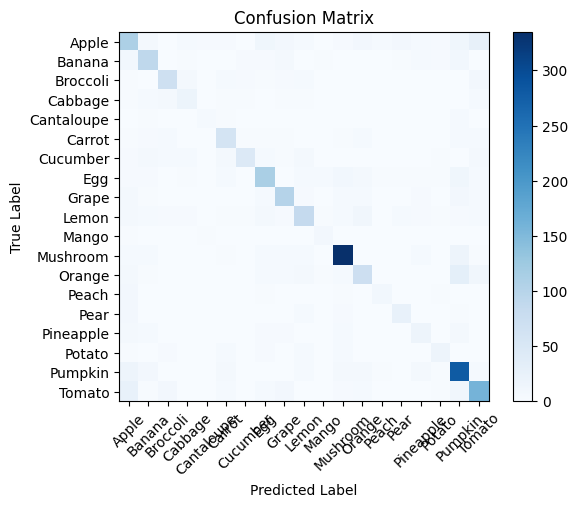

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming 'all_preds' and 'all_labels' are lists containing predicted and ground truth labels, respectively
plot_confusion_matrix(labels, preds, class_names)


In [ ]:
def imshow_with_labels(inputs, preds, labels, class_names, num_images=16):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        image = inputs[i].cpu().numpy().transpose((1, 2, 0))
        plt.imshow(image)
        plt.title(f"True Label: {class_names[labels[i]]}\nPredicted Label: {class_names[preds[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


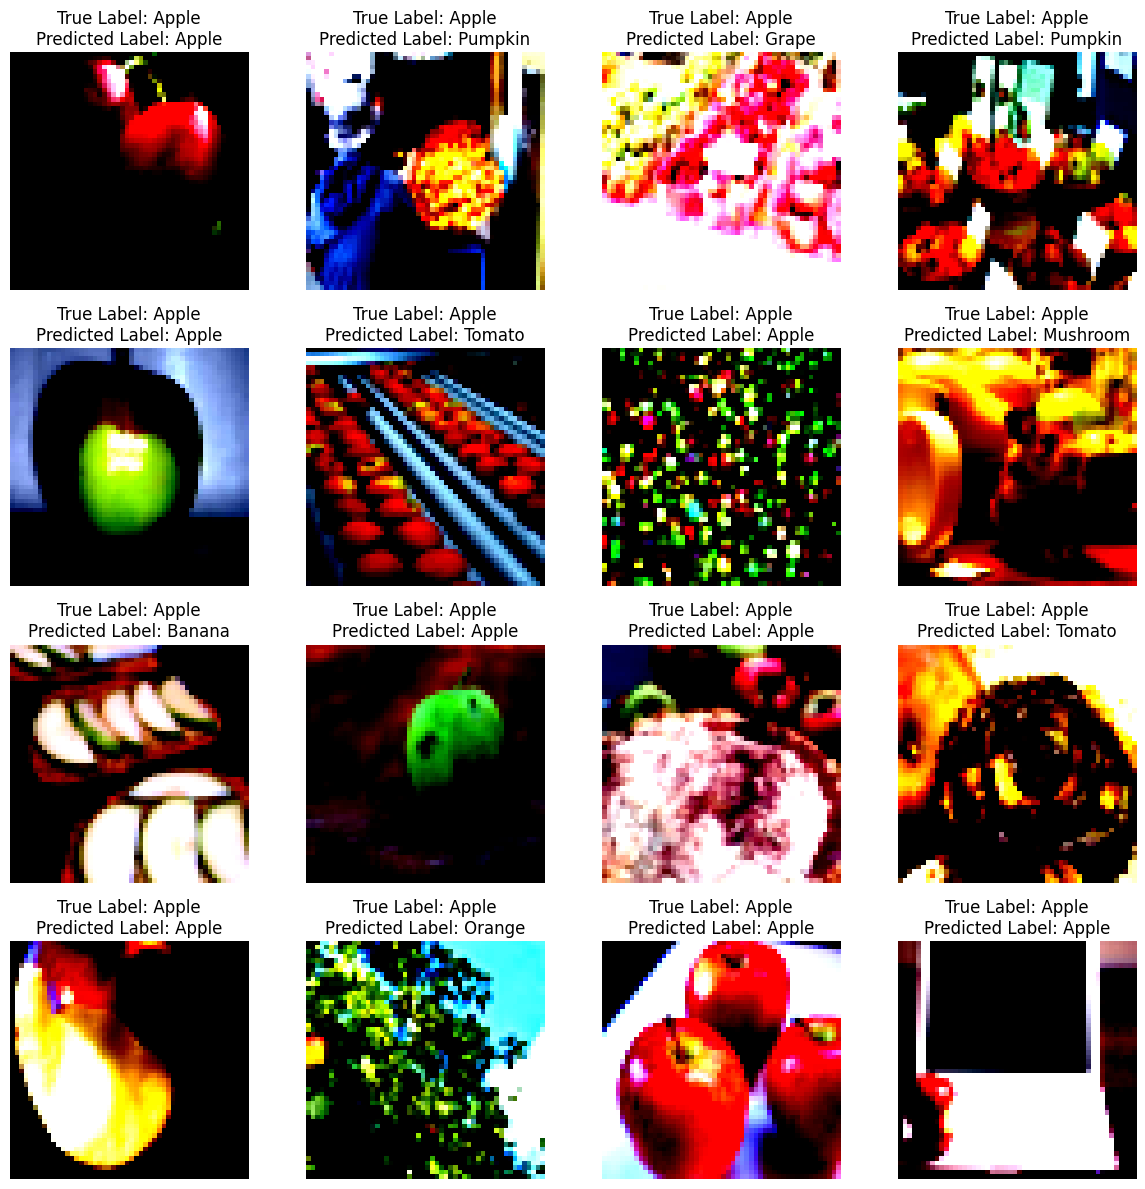

In [ ]:
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)
with torch.no_grad():
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)

imshow_with_labels(inputs, preds, labels, class_names)
